In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### `something`

#### `something`

### Data Augmentation

#### `speed change`

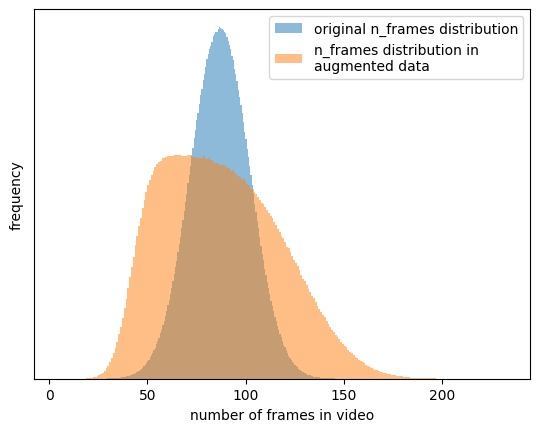

In [15]:
data = np.random.normal(87,15, 10_000_000)
_ = plt.hist(data, bins=250, alpha=0.5, label = 'original n_frames distribution')
_ = plt.hist(data * (np.random.rand(len(data))*1.+0.5), bins=250, alpha=0.5, label = 'n_frames distribution in\naugmented data')
plt.yticks([])
plt.ylabel('frequency')
plt.xlabel('number of frames in video')
plt.legend()
plt.show()

#### `slow spots`

total = 100 
 ('spot = 22', '0.579', '0.055') 
 ('rand = 12',) 
 ('linr = 66', '0.854')


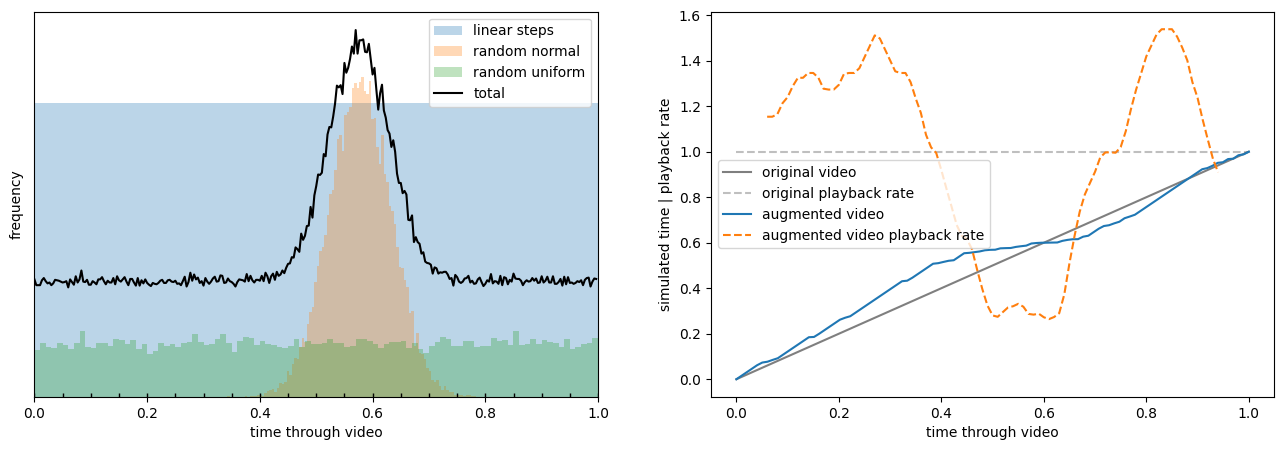

In [ ]:
total = 100
spot = int( min(total/4 , np.random.normal(20,2.5,1)))
j = np.random.rand(1)
linr = int(max(max(total/4, 20), (total - spot) * j))
rand = total - spot - linr
if rand < 0:
    print('here')
    spot += rand
    rand = 0

old = 67
std = spot/total /4
loc = np.random.rand(1) * (1 - 2*std) + std

print(f'{total = }','\n', (f'{spot = }', f'{float(loc):.3f}', f'{float(std):.3f}'),'\n', (f'{rand = }',),'\n', (f'{linr = }', f'{float(j):.3f}'))

fac = 1_000

uni = (rand)*fac
nor = (spot)*fac
lin = linr*fac

n_bins = old

lr = np.linspace(0,1,lin)
nr = np.random.normal(loc,std,nor)
nr = nr[(nr>0) & (nr<1)]
ru = np.random.rand(uni)


x = np.abs(np.concatenate([lr,nr,ru]))

total_hist = plt.hist(x, bins=300, alpha=0.1, color='black')
plt.close()

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.hist(lr, bins=100+0*round(n_bins*linr/total), label = 'linear steps', alpha=0.3)
plt.hist(nr, bins=100+0*round(n_bins*spot/total), label = 'random normal', alpha=0.3)
plt.hist(ru, bins=100+0*round(n_bins*rand/total), label = 'random uniform', alpha=0.3)

plt.plot(total_hist[1][:-1], total_hist[0],color='black', label='total')
# plt.hist(x, bins=old, alpha=0.1, color='black')
plt.plot(np.linspace(0,1,21), np.zeros(21), '|', color = 'black')
plt.xlim(0,1)
plt.yticks([])
plt.ylabel('frequency')
plt.xlabel('time through video')
plt.legend()


lr = np.linspace(0,1,int(lin/fac))
nr = np.random.normal(loc,std,int(nor/fac))
nr = nr[(nr>0) & (nr<1)]
ru = np.random.rand(int(uni/fac))
x = np.abs(np.concatenate([lr,nr,ru]))

n_repeats = int(total/25*fac)
n_repeats = int(total/25)
filter = np.repeat([-1,0,1],n_repeats)/n_repeats/(2*n_repeats/len(x))
sorted_x = np.sort(x)
plt.subplot(1,2,2)
plt.plot([0,1],[0,1], alpha=0.5,color='black', label='original video')
plt.plot([0,1],[1,1], '--', alpha=0.25,color='black', label='original playback rate')
plt.plot(np.linspace(0,1,len(sorted_x)),sorted_x, label='augmented video')
plt.plot(np.linspace(0+len(filter)/len(x)/2,1-len(filter)/len(x)/2,len(sorted_x)-len(filter)+1), np.convolve(sorted_x, filter[::-1], mode='valid'), '--',label='augmented video playback rate')
plt.xlabel('time through video')
plt.ylabel('simulated time | playback rate')
plt.legend()
plt.show()

# more